## LIBs sử dụng

In [21]:
import numpy as np
import os
import PIL
import PIL.Image as Img
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
! pip install tensorflow_datasets


     ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
      --------------------------------------- 0.1/5.4 MB 2.6 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/5.4 MB 3.4 MB/s eta 0:00:02
     --- ------------------------------------ 0.5/5.4 MB 3.5 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.4 MB 3.9 MB/s eta 0:00:02
     ---- ----------------------------------- 0.6/5.4 MB 3.9 MB/s eta 0:00:02
     ------- -------------------------------- 1.1/5.4 MB 4.3 MB/s eta 0:00:02
     ---------- ----------------------------- 1.4/5.4 MB 4.3 MB/s eta 0:00:01
     ---------- ----------------------------- 1.4/5.4 MB 4.4 MB/s eta 0:00:01
     ------------ --------------------------- 1.6/5.4 MB 4.0 MB/s eta 0:00:01
     --------------- ------------------------ 2.0/5.4 MB 4.5 MB/s eta 0:00:01
     ---------------- ----------------------- 2.3/5.4 MB 4.5 MB/s eta 0:00:01
     ------------------ --------------------- 2.5/5.4 MB 4.7 MB/s eta 0


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
## xem thư mục chứa

! dir "./Data/Data01/Train"

 Volume in drive D is Working
 Volume Serial Number is 2C08-326C

 Directory of D:\xCoding\Notebook\Data\Data01\Train

05/09/2023  11:18 AM    <DIR>          .
05/09/2023  11:18 AM    <DIR>          ..
05/09/2023  11:18 AM    <DIR>          10 - Hoa dam but
05/09/2023  11:18 AM    <DIR>          11 - Hoa huong duong
05/09/2023  11:18 AM    <DIR>          12 - Hong tu cau
05/09/2023  11:18 AM    <DIR>          13 - Hoa oi
05/09/2023  11:18 AM    <DIR>          14 - Hoa Tram Oi
05/09/2023  11:18 AM    <DIR>          15 - Lan hac vy
05/09/2023  11:18 AM    <DIR>          16 - Hoa ban
05/09/2023  11:18 AM    <DIR>          17 - Hoa atiso
05/09/2023  11:18 AM    <DIR>          18 - Tung tuyet mai
05/09/2023  11:18 AM    <DIR>          19 - Hoa Phao Bong
               0 File(s)              0 bytes
              12 Dir(s)   2,888,564,736 bytes free


In [28]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

archive = tf.keras.utils.get_file(origin=dataset_url, 
                                  cache_subdir='D:/xCoding/Notebook/Data/Data02',
                                  extract=True)

data_dir = pathlib.Path(archive).with_suffix('')

data_dir

228813984/228813984 [==============================] - 75s 0us/step


WindowsPath('D:/xCoding/Notebook/Data/Data02/flower_photos')

In [29]:
lst = list(data_dir.glob( '*/*' ))
len(lst) , lst[:2]


(3670,
 [WindowsPath('D:/xCoding/Notebook/Data/Data02/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
  WindowsPath('D:/xCoding/Notebook/Data/Data02/flower_photos/daisy/10140303196_b88d3d6cec.jpg')])

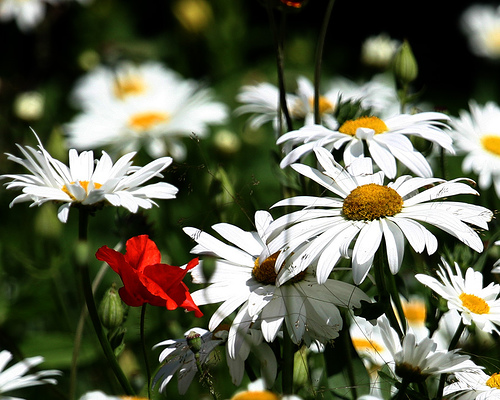

In [24]:
Img.open(lst[5])

In [53]:
## Load Data 

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    ## validation_split=None,
    seed=123, 
    image_size=(256,256),
    color_mode='rgb',
    batch_size=16,
    ## shuffle=True,
)
    
    

Found 3670 files belonging to 5 classes.


In [54]:
class_names = train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

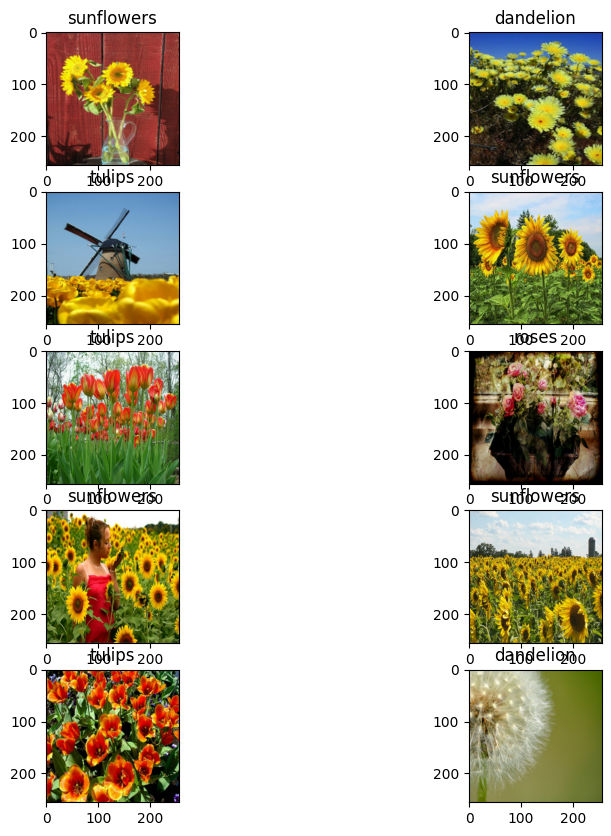

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(5, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [56]:
for image_batch, labels_batch in list(train_ds)[:3]:
    print(image_batch.shape)
    print(labels_batch.shape, labels_batch)

(16, 256, 256, 3)
(16,) tf.Tensor([3 2 0 4 3 1 4 3 4 4 1 3 4 4 2 4], shape=(16,), dtype=int32)
(16, 256, 256, 3)
(16,) tf.Tensor([1 3 0 4 4 3 1 2 1 3 4 1 2 4 4 0], shape=(16,), dtype=int32)
(16, 256, 256, 3)
(16,) tf.Tensor([4 3 1 4 4 3 1 4 3 1 1 4 3 4 0 2], shape=(16,), dtype=int32)


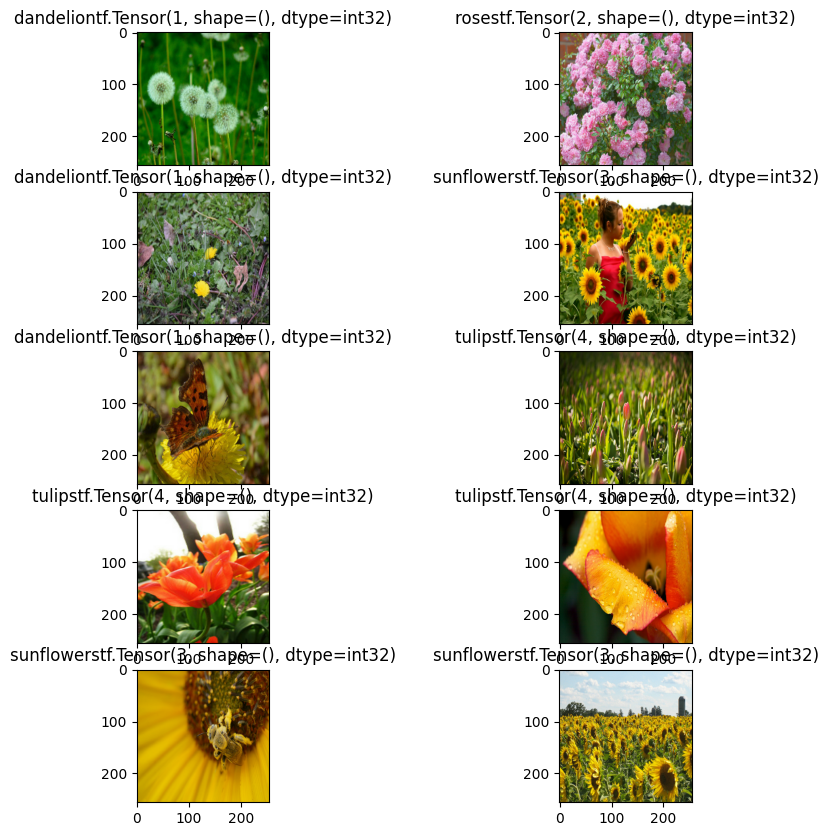

In [57]:
plt.figure(figsize=(10, 10))

dshinh = list(train_ds)[:5]
for i in range(5):
    for j in range(2):
        k = i*2 + j + 1
        ax = plt.subplot(5, 2, k)
        plt.imshow(dshinh[i][0][j].numpy().astype("uint8"))
        plt.title(class_names[ dshinh[i][1][j] ] + str(dshinh[i][1][j]))